Tensorflow

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

In [21]:
# 1. Load and normalize the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Scale pixels to [0, 1]

In [22]:
# 2. Build a simple Sequential model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),    # Convert 2D image to 1D vector
    layers.Dense(128, activation='relu'),    # Hidden layer with 128 neurons
    layers.Dropout(0.2),                     # Prevent overfitting
    layers.Dense(10, activation='softmax')   # Output layer (10 classes)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
# 3. Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8575 - loss: 0.4848
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9541 - loss: 0.1523
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9641 - loss: 0.1161
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9724 - loss: 0.0891
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9778 - loss: 0.0728


In [24]:
# 4. Evaluate
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9707 - loss: 0.0926


[0.07497721910476685, 0.9758999943733215]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


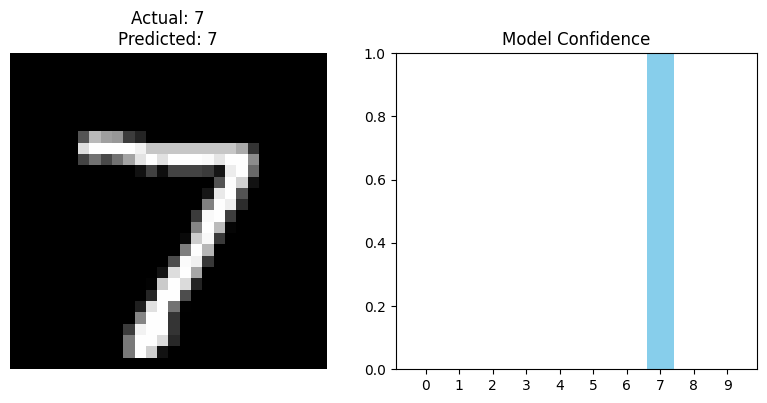

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Pick an image from your TensorFlow test set
# (x_test was defined in the TensorFlow section)
index = 0
test_img = x_test[index]
true_label = y_test[index]

# 2. TensorFlow Prediction (No .eval() needed!)
# Just reshape to (1, 28, 28) and predict
prediction_probs = model.predict(test_img.reshape(1, 28, 28))
predicted_label = np.argmax(prediction_probs)

# 3. Plotting
plt.figure(figsize=(8, 4))

# Left side: The Image
plt.subplot(1, 2, 1)
plt.imshow(test_img, cmap='gray')
plt.title(f"Actual: {true_label}\nPredicted: {predicted_label}")
plt.axis('off')

# Right side: Confidence
plt.subplot(1, 2, 2)
plt.bar(range(10), prediction_probs[0], color='skyblue')
plt.xticks(range(10))
plt.ylim([0, 1])
plt.title("Model Confidence")

plt.tight_layout()
plt.show()

In [29]:
print(type(model))

<class 'keras.src.models.sequential.Sequential'>


PyTorch


In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

In [31]:
# 1. Data Prep
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [32]:
# 2. Define the Architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.main = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.main(x)

model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [33]:
# 3. Simple Training Loop
for epoch in range(5):
    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} completed")

Epoch 1 completed
Epoch 2 completed
Epoch 3 completed
Epoch 4 completed
Epoch 5 completed


AI Prediction: 5
Actual Label: 5


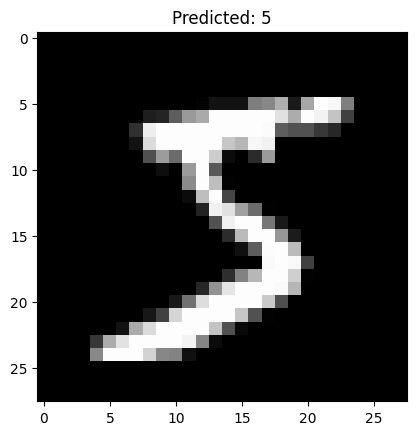

In [34]:
import matplotlib.pyplot as plt

# Set model to evaluation mode
model.eval()

# Grab one batch from the test loader
dataiter = iter(torch.utils.data.DataLoader(trainset, batch_size=1))
images, labels = next(dataiter)

# Disable gradient calculation for efficiency
with torch.no_grad():
    output = model(images)
    _, predicted = torch.max(output, 1)

print(f"AI Prediction: {predicted.item()}")
print(f"Actual Label: {labels.item()}")

# Reshape image for display (PyTorch uses [Channel, Height, Width])
plt.imshow(images.view(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted.item()}")
plt.show()